# Initialisation

### Chargement des packages

In [1]:
!pip install scikit-plot
!pip install tpot

     |████████████████████████████████| 81kB 3.9MB/s 
     |████████████████████████████████| 61kB 8.8MB/s 
     |████████████████████████████████| 163kB 37.2MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11956 sha256=1284690750917d054a9924680bf380f3213dd51560d5c2c82e53ec618f39cd73
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1


In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import collections
from sklearn.model_selection import train_test_split
import scikitplot as skplt
from sklearn.metrics import (
    accuracy_score, roc_auc_score, fbeta_score, 
    brier_score_loss, roc_curve)
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from tpot import TPOTClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

In [0]:
%matplotlib inline

In [0]:
np.random.seed(1234)

### Chargement des données

In [0]:
# Charger les données en un objet dataframe
visa_df = pd.read_csv("VisaPremier.txt", delimiter="\t")
visa_raw = pd.read_csv("VisaPremier.txt", delimiter="\t")

In [6]:
# Afficher les premiers éléments du jeu de données
visa_df.head()

,matricul,departem,ptvente,sexe,age,sitfamil,anciente,csp,codeqlt,nbimpaye,mtrejet,nbopguic,moycred3,aveparmo,endette,engagemt,engagemc,engagemm,nbcptvue,moysold3,moycredi,agemvt,nbop,mtfactur,engageml,nbvie,mtvie,nbeparmo,mteparmo,nbeparlo,mteparlo,nblivret,mtlivret,nbeparlt,mteparlt,nbeparte,mteparte,nbbon,mtbon,nbpaiecb,nbcb,nbcbptar,avtscpte,aveparfi,cartevp,sexer,cartevpr,nbjdebit
0,148009,31,1,Shom,51,Fmar,238,Pcad,A,0,0,0,115,701939,4,119216,0,119216,2,35938,114,11,49,206016,0,1,152530,4,701939,2,520145,2,181794,0,0,0,0,0,0,14,2,0,1303700,556967,Coui,0,1,1
1,442153,82,6,Shom,52,Fmar,270,Pcad,A,0,0,4,19579,8920,0,0,0,0,1,132468,4079,11,50,98500,0,0,0,3,19508920,2,8920,0,0,0,0,0,0,1,19500000,5,2,0,19856243,133896,Coui,0,1,0
2,552427,97,1,Shom,58,Fmar,139,Pcad,C,0,0,0,40,3402,0,0,0,0,1,1336,40,14,2,3394,0,0,0,1,3402,0,0,1,3402,0,0,0,0,0,0,0,1,0,122745,0,Coui,0,1,0
3,556005,40,1,Shom,27,Fcel,99,Psan,B,0,0,0,17,76321,0,0,0,0,1,12221,17,11,23,0,0,0,0,3,76321,1,46312,2,30009,0,0,0,0,0,0,14,2,0,83224,0,Coui,0,1,0
4,556686,65,1,Shom,49,Fsep,89,Pemp,A,0,0,0,374,473350,0,209062,37859,171203,1,21187,208,11,49,0,0,1,21423,5,473350,3,399999,2,73351,0,0,0,0,0,0,11,3,1,494773,21423,Coui,0,1,15


In [7]:
# Afficher la dimension du jeu de données
visa_df.shape

(1073, 48)

# Prétraitement des données

### Nettoyage des données

In [8]:
# Afficher les types de données des colonnes et les valeurs manquantes
visa_df.info()
visa_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 48 columns):
matricul    1073 non-null int64
departem    1073 non-null object
ptvente     1073 non-null int64
sexe        1073 non-null object
age         1073 non-null int64
sitfamil    1073 non-null object
anciente    1073 non-null int64
csp         1073 non-null object
codeqlt     1073 non-null object
nbimpaye    1073 non-null int64
mtrejet     1073 non-null int64
nbopguic    1073 non-null int64
moycred3    1073 non-null int64
aveparmo    1073 non-null int64
endette     1073 non-null int64
engagemt    1073 non-null int64
engagemc    1073 non-null int64
engagemm    1073 non-null int64
nbcptvue    1073 non-null int64
moysold3    1073 non-null int64
moycredi    1073 non-null int64
agemvt      1073 non-null object
nbop        1073 non-null int64
mtfactur    1073 non-null int64
engageml    1073 non-null int64
nbvie       1073 non-null int64
mtvie       1073 non-null int64
nbeparmo    1073 non-nu

matricul    0
departem    0
ptvente     0
sexe        0
age         0
sitfamil    0
anciente    0
csp         0
codeqlt     0
nbimpaye    0
mtrejet     0
nbopguic    0
moycred3    0
aveparmo    0
endette     0
engagemt    0
engagemc    0
engagemm    0
nbcptvue    0
moysold3    0
moycredi    0
agemvt      0
nbop        0
mtfactur    0
engageml    0
nbvie       0
mtvie       0
nbeparmo    0
mteparmo    0
nbeparlo    0
mteparlo    0
nblivret    0
mtlivret    0
nbeparlt    0
mteparlt    0
nbeparte    0
mteparte    0
nbbon       0
mtbon       0
nbpaiecb    0
nbcb        0
nbcbptar    0
avtscpte    0
aveparfi    0
cartevp     0
sexer       0
cartevpr    0
nbjdebit    0
dtype: int64

Nous remarquons qu'il existe plusieurs variables quantitatives stockées en tant qu'objets. Nous allons donc convertir ces colonnes en type de données numériques (int64).
Notons également que le jeu de données de contient aucune valeur nulle!

In [9]:
# Nombre de lignes dupliquée
sum(visa_df.duplicated())

0

In [10]:
# Afficher le nombre d'occurences des valeurs des variables catégorielles
for col in visa_df.loc[:, visa_df.dtypes == np.object]:
  print(col)
  print(visa_df[col].value_counts())

departem
31    691
65    141
32     69
82     69
75     14
64      9
97      8
81      7
9       7
.       7
92      6
11      5
66      4
40      3
13      3
94      3
47      3
24      3
46      2
12      2
17      2
33      2
69      2
78      1
56      1
95      1
34      1
6       1
16      1
54      1
45      1
14      1
63      1
77      1
Name: departem, dtype: int64
sexe
Shom    668
Sfem    405
Name: sexe, dtype: int64
sitfamil
Fmar    547
Fcel    360
Fdiv     86
F.       32
Fuli     25
Fsep     14
Fveu      9
Name: sitfamil, dtype: int64
csp
Pcad     446
Pemp     288
Psan     199
Pouv      85
Part      31
Pret      21
Pinc       2
Pagri      1
Name: csp, dtype: int64
codeqlt
B    303
C    218
A    207
D    168
.    133
E     44
Name: codeqlt, dtype: int64
agemvt
13     388
14     180
0      109
15      81
11      71
      ... 
210      1
25       1
98       1
205      1
34       1
Name: agemvt, Length: 64, dtype: int64
nbpaiecb
.     278
0     213
1      36
10     31
11     2

Nous remarquons qu'il existe quelques catégories de variables notées "." ou "F." dans plusieurs de nos colonnes de type objet. D'après l'énoncé, pour la variable "sitfamil" par exemple, la catégorie "F." n'existe pas. Nous faisons donc le choix de considérer les catégories "F." et "." comme valeurs manquantes!

In [0]:
# Détecter les valeurs manquantes et les remplacer
visa_df = visa_df.replace(['.', 'F.'], np.nan)
for col in visa_df.loc[:, visa_df.dtypes == np.object]:
    visa_df[col].fillna(visa_df[col].mode()[0], inplace=True)

En lisant le dictionnaire des variables de la table Visa, nous nous rendons compte que les variables "sexer" et "cartevpr" sont des doublons des variables "sexe" et "cartevp". Nous allons donc les retirer.

In [0]:
visa_df = visa_df.drop(['sexer', 'cartevpr'], axis = 1)

### Formatage des données

In [0]:
# Encoder les variables catégorielles
for col in visa_df.loc[:, visa_df.dtypes == np.object]:
  visa_df[col] = visa_df[col].astype('category').cat.codes

### Normalisation des données

In [0]:
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(visa_df) 
visa_df.loc[:,:] = scaled_values

In [15]:
visa_df.head()

,matricul,departem,ptvente,sexe,age,sitfamil,anciente,csp,codeqlt,nbimpaye,mtrejet,nbopguic,moycred3,aveparmo,endette,engagemt,engagemc,engagemm,nbcptvue,moysold3,moycredi,agemvt,nbop,mtfactur,engageml,nbvie,mtvie,nbeparmo,mteparmo,nbeparlo,mteparlo,nblivret,mtlivret,nbeparlt,mteparlt,nbeparte,mteparte,nbbon,mtbon,nbpaiecb,nbcb,nbcbptar,avtscpte,aveparfi,cartevp,nbjdebit
0,0.004638,0.21875,0.000000,1.0,0.702128,0.4,0.272727,0.285714,0.00,0.0,1.0,0.000000,0.005874,0.723648,0.040404,0.034327,0.0000,0.073670,0.50,0.339839,0.027948,0.048387,0.187023,0.154721,0.0,0.076923,0.027989,0.444444,0.035980,0.50,0.897416,0.50,0.187416,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.4,0.00,0.065657,0.078817,1.0,0.007463
1,0.043983,0.84375,0.833333,1.0,0.723404,0.4,0.309551,0.285714,0.00,0.0,1.0,0.142857,1.000000,0.009196,0.000000,0.000000,0.0000,0.000000,0.25,0.649352,1.000000,0.048387,0.190840,0.073975,0.0,0.000000,0.000000,0.333333,1.000000,0.50,0.015390,0.00,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.777778,0.4,0.00,1.000000,0.018948,1.0,0.000000
2,0.058733,1.00000,0.000000,1.0,0.851064,0.4,0.158803,0.285714,0.50,0.0,1.0,0.000000,0.002043,0.003507,0.000000,0.000000,0.0000,0.000000,0.25,0.228892,0.009806,0.145161,0.007634,0.002549,0.0,0.000000,0.000000,0.111111,0.000174,0.00,0.000000,0.25,0.003507,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.2,0.00,0.006182,0.000000,1.0,0.000000
3,0.059212,0.34375,0.000000,1.0,0.191489,0.0,0.112773,1.000000,0.25,0.0,1.0,0.000000,0.000868,0.078681,0.000000,0.000000,0.0000,0.000000,0.25,0.263793,0.004168,0.048387,0.087786,0.000000,0.0,0.000000,0.000000,0.333333,0.003912,0.25,0.079903,0.50,0.030937,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.4,0.00,0.004191,0.000000,1.0,0.000000
4,0.059303,0.62500,0.000000,1.0,0.659574,0.6,0.101266,0.428571,0.00,0.0,1.0,0.000000,0.019102,0.487990,0.000000,0.060197,0.0756,0.105796,0.25,0.292542,0.050993,0.048387,0.187023,0.000000,0.0,0.076923,0.003931,0.555556,0.024263,0.75,0.690126,0.50,0.075620,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.6,0.25,0.024918,0.003032,1.0,0.111940


In [16]:
visa_df.shape

(1073, 46)

À la fin du processus de prétraitement des données et de suppression des anomalies, il nous reste plus de 1073 lignes et 46 variables.

# Analyse exploratoire des données

Maintenant que l'étape fastidieuse - mais nécessaire - du nettoyage des données est terminée, nous pouvons passer à l'exploration de nos données. L'analyse exploratoire des données (EDA) est un processus ouvert où nous calculons des statistiques et cherchons des tendances, des anomalies, des modèles ou des relations dans les données.
En bref, l'objectif d'EDA est d'apprendre ce que nos données peuvent nous dire. Nous commençons généralement par un aperçu de haut niveau, puis nous nous attaquons à des domaines spécifiques lorsque nous trouvons des parties intéressantes des données. Les résultats peuvent être intéressants en soi, ou ils peuvent être utilisés pour éclairer nos choix de modélisation, par exemple en nous aidant à décider quels algorithmes à utiliser.

### Statistiques élémentaires

Maintenant que notre jeu de données est bien encodé et normalisé, nous pouvons appeler la fonction describe() pour avoir un idée sur quelques éléments statistiques.


In [17]:
visa_df.describe()

,matricul,departem,ptvente,sexe,age,sitfamil,anciente,csp,codeqlt,nbimpaye,mtrejet,nbopguic,moycred3,aveparmo,endette,engagemt,engagemc,engagemm,nbcptvue,moysold3,moycredi,agemvt,nbop,mtfactur,engageml,nbvie,mtvie,nbeparmo,mteparmo,nbeparlo,mteparlo,nblivret,mtlivret,nbeparlt,mteparlt,nbeparte,mteparte,nbbon,mtbon,nbpaiecb,nbcb,nbcbptar,avtscpte,aveparfi,cartevp,nbjdebit
count,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.0,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000
mean,0.317809,0.348614,0.110593,0.622554,0.521961,0.266729,0.179652,0.497803,0.361603,0.0,0.998575,0.053754,0.002433,0.059020,0.055118,0.022263,0.008384,0.012501,0.256990,0.258834,0.006351,0.158449,0.110683,0.017558,0.015229,0.018424,0.006590,0.163715,0.003867,0.163094,0.055528,0.189655,0.021381,0.009786,0.007730,0.002796,0.000932,0.000932,0.000932,0.203686,0.213979,0.034017,0.007394,0.007178,0.334576,0.090185
std,0.257533,0.226828,0.180945,0.484974,0.253301,0.215496,0.179592,0.277397,0.273090,0.0,0.030958,0.099903,0.030782,0.119883,0.124542,0.070535,0.043635,0.045997,0.124804,0.077016,0.032607,0.152702,0.103039,0.058640,0.063806,0.060606,0.051224,0.142753,0.031017,0.199015,0.129288,0.196827,0.062665,0.049694,0.059195,0.052827,0.030528,0.030528,0.030528,0.299178,0.173609,0.094796,0.037156,0.048110,0.472062,0.174146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.099932,0.218750,0.000000,0.000000,0.319149,0.000000,0.050633,0.285714,0.250000,0.0,1.000000,0.000000,0.000153,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.225999,0.000490,0.129032,0.022901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000160,0.000000,0.000000,0.000000
50%,0.245482,0.218750,0.000000,1.000000,0.531915,0.400000,0.155351,0.428571,0.250000,0.0,1.000000,0.035714,0.000613,0.006203,0.000000,0.000000,0.000000,0.000000,0.250000,0.238623,0.002697,0.129032,0.095420,0.000000,0.000000,0.000000,0.000000,0.111111,0.000308,0.000000,0.000000,0.250000,0.000131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,0.200000,0.000000,0.001208,0.000000,0.000000,0.000000
75%,0.506716,0.593750,0.166667,1.000000,0.723404,0.400000,0.247411,0.714286,0.500000,0.0,1.000000,0.071429,0.001379,0.059606,0.060606,0.010057,0.000000,0.000000,0.250000,0.259987,0.005884,0.145161,0.164122,0.002629,0.000000,0.000000,0.000000,0.222222,0.002993,0.250000,0.041156,0.250000,0.016025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.296296,0.400000,0.000000,0.005782,0.000071,1.000000,0.074627
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Nous remarquons que certaines variables présentent une variance nulle (ou presque nulle). Nous choisisons de retirer la variable "nbimpaye" dont la variance est nulle.

In [0]:
visa_df = visa_df.drop("nbimpaye", axis=1)

### Tracé de la variable à prédire

L'objectif est de prédire la variable "cartevp" (possession de la carte Visa Premier) donc un point de départ raisonnable est d'examiner la distribution de cette variable. Un histogramme est un moyen simple mais efficace de visualiser la distribution d'une seule variable et est facile à réaliser en utilisant la bibliothèque matplotlib.

Text(0.5, 1.0, 'Distribution de la possession de la carte Visa Premier')

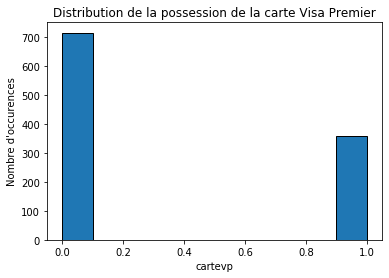

In [19]:
# Histogramme de la possession de la carte Visa Premier
plt.hist(visa_df['cartevp'], edgecolor = 'k')
plt.xlabel('cartevp')
plt.ylabel('Nombre d\'occurences')
plt.title('Distribution de la possession de la carte Visa Premier')

In [20]:
# Ratio des deux classes
print("Ration de la classe 1 : {:.3f}".format(sum(visa_df['cartevp']==1)/len(visa_df['cartevp'])))
print("Ration de la classe 0 : {:.3f}".format(sum(visa_df['cartevp']!=1)/len(visa_df['cartevp'])))

Ration de la classe 1 : 0.335
Ration de la classe 0 : 0.665


D'après ces résultats, nous pouvons dire que les deux classes ne sont pas très "non balancée". Nous allons continuer notre étude en utilisant ce jeu de données.(Notons qu'il est possible d'équilibrer les classes en utilisant des techniques d'augmentation de données, ou en utilisant une sous partie du jeu de données)

### Coefficient de corrélation de Pearson

Pour quantifier les relations entre les variables, nous pouvons utiliser le coefficient de corrélation de Pearson. Il s'agit d'une mesure de la force et de la direction d'une relation linéaire entre deux variables. Un score de +1 est une relation positive parfaitement linéaire et un score de -1 est une relation linéaire parfaitement négative.

In [0]:
# Trouver toutes les corrélations avec "cartevp" et trier les résultats
cartevp_correlations_data = visa_df.corr()['cartevp'].sort_values()

In [22]:
cartevp_correlations_data

csp        -0.342933
nbcbptar   -0.124282
agemvt     -0.109113
codeqlt    -0.072834
ptvente    -0.055002
mtrejet    -0.038678
mteparte   -0.021657
departem   -0.015211
nbeparte   -0.000139
anciente    0.028880
matricul    0.031918
mtbon       0.043073
nbbon       0.043073
mtvie       0.073625
endette     0.077901
mteparlt    0.078471
moycred3    0.081456
mteparmo    0.085844
nbeparlt    0.098895
nbvie       0.100360
aveparfi    0.102447
sitfamil    0.110446
nblivret    0.117101
age         0.121163
avtscpte    0.137479
nbjdebit    0.137485
nbeparlo    0.145954
moycredi    0.157435
nbpaiecb    0.160764
mteparlo    0.162843
engageml    0.170818
engagemc    0.180263
nbeparmo    0.186162
mtlivret    0.189433
moysold3    0.206710
aveparmo    0.226310
engagemm    0.234644
engagemt    0.241902
nbopguic    0.268203
mtfactur    0.270604
nbop        0.282206
nbcptvue    0.296730
sexe        0.323946
nbcb        0.505165
cartevp     1.000000
Name: cartevp, dtype: float64

In [23]:
csp_dict = collections.OrderedDict()
code_num = list(visa_raw["csp"].value_counts().keys())
encoded_code_num = list(visa_df["csp"].value_counts().keys())
for i in range (len(code_num)):
    csp_dict[encoded_code_num[i]] = code_num[i]

csp_dict

OrderedDict([(0.2857142857142857, 'Pcad'),
             (0.42857142857142855, 'Pemp'),
             (1.0, 'Psan'),
             (0.7142857142857142, 'Pouv'),
             (0.14285714285714285, 'Part'),
             (0.8571428571428571, 'Pret'),
             (0.5714285714285714, 'Pinc'),
             (0.0, 'Pagri')])

Bien que le coefficient de corrélation ne puisse pas saisir les relations non linéaires, c'est un bon moyen de commencer à comprendre comment les variables sont liées. 
Il existe plusieurs corrélations  entre les caractéristiques et la cible: "csp" étant la plus négative et "nbcb" qui est la plus positive. Etant donné les valeurs de la variable "csp", qui initialement était de type catégoriel, nous constatons que les catégories socio-professionnelle Psan (sans travail), Pret (retraité), Pouv (Ouvrier) ont tendance à ne pas avoir de carte Visa Premier. D'un autre coté, d'après la variable "nbcb", le nombre total des cartes qu'un idividu possède est fortement lié à la possession d'une carte Visa Premier. 

### Relations entre les variables

Heat Maps est un type de tracé qui est nécessaire lorsque nous devons trouver les variables dépendantes. L'une des meilleures façons de trouver la relation entre les entités peut être effectuée à l'aide de cartes thermiques.

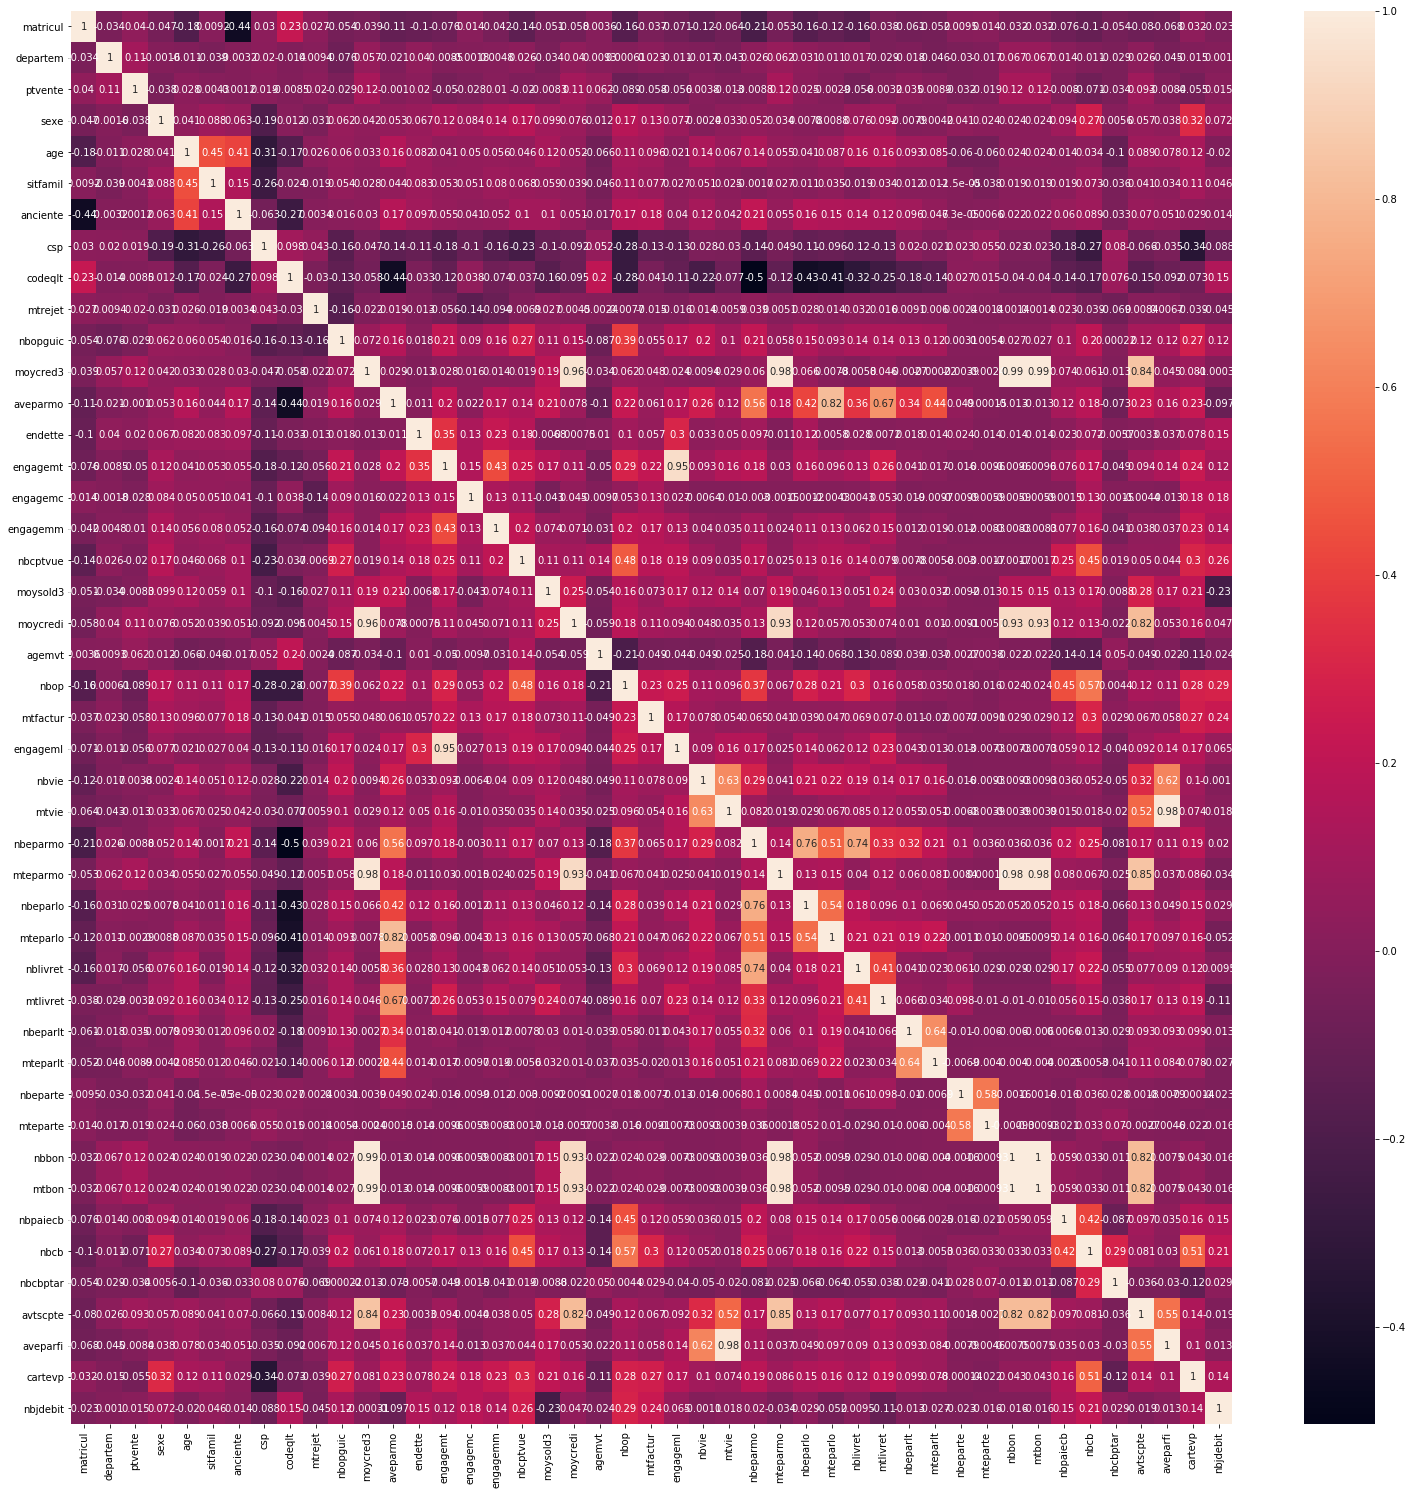

In [24]:
plt.figure(figsize=(26, 26))
sns.heatmap(visa_df.corr(), annot=True)

En un premier lieu, nous remarquons que nous avons deux colonnes égaux "nbbon" et "mtbon", nous allons en retirer une.

In [0]:
visa_df = visa_df.drop("nbbon", axis=1)

Visuellement nous detectons l'existance d'autres variables qui sont fortement correlées. Nous les séléctionnons d'une manière programmatique dans la cellule qui suit.

In [26]:
corr_matrix = visa_df.corr()    
# Selectionner le triangle superieur de la matrice de correlation
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Selectionner les indices des variables avec une valeur de correlation supérieure à 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)

['moycredi', 'mteparmo', 'mtbon', 'aveparfi']


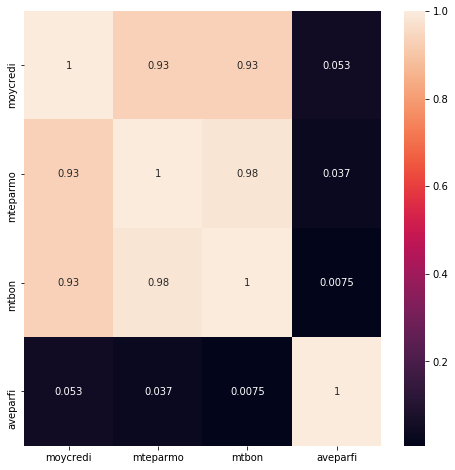

In [27]:
plt.figure(figsize=(8, 8))
sns.heatmap(visa_df[to_drop].corr(), annot=True)

A partir de la carte termique ci-dessus, nous pouvons déduire que la variable "aveparfi" est à garder vue qu'elle n'est pas correlée avec les autres variables à retirer. Nous voyons que les variables "mtbon" et "mteparmo" sont fortement corrélées entre elles (0.98). Par conséquent, nous ne conserverions qu'une des deux "mtbon" et supprimons l'autre. De même pour "moycredi" que nous supprimons finalement.

In [0]:
visa_df = visa_df.drop(["mteparmo", "moycredi"] , axis=1)

### Détection des valeurs aberrantes

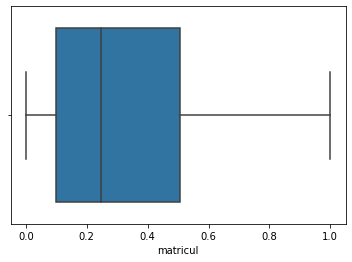

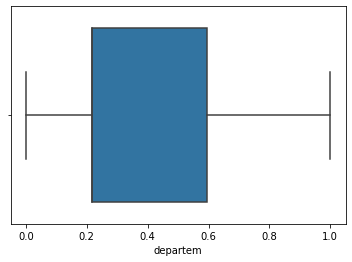

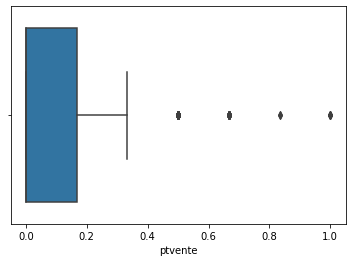

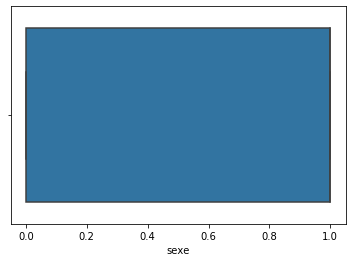

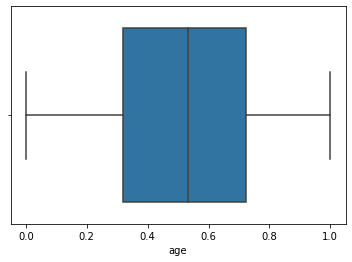

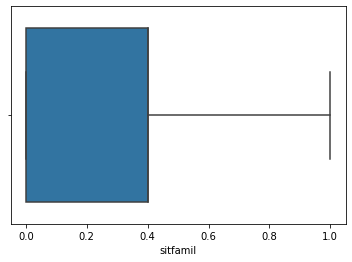

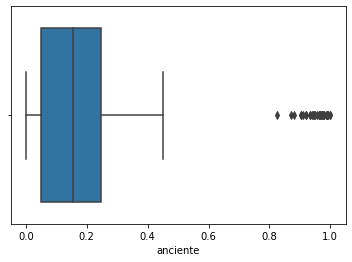

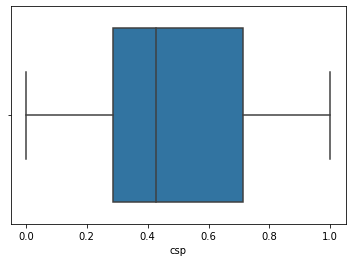

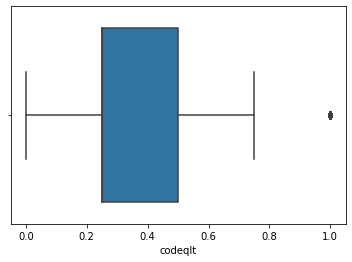

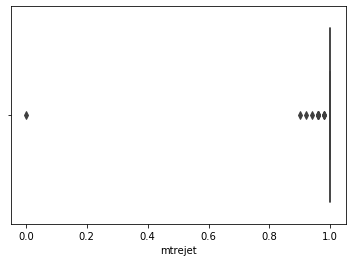

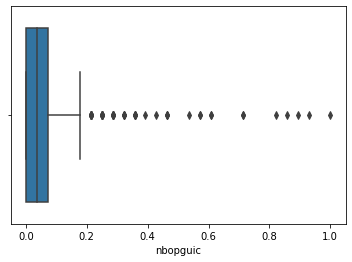

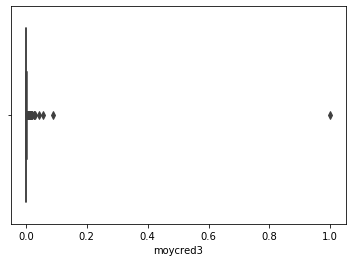

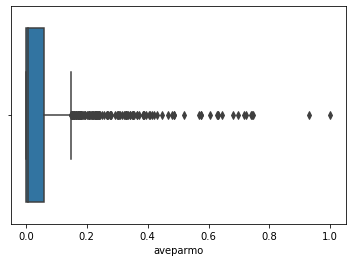

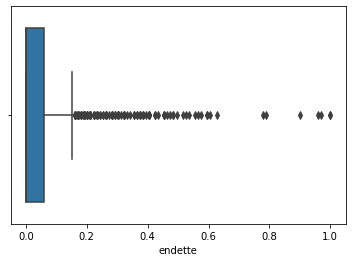

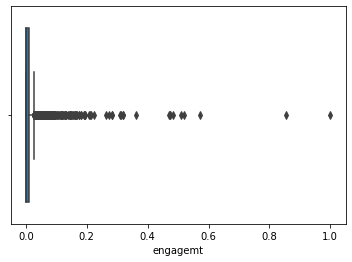

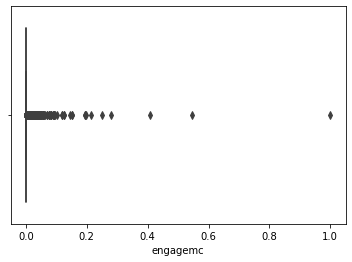

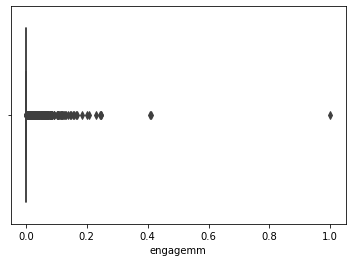

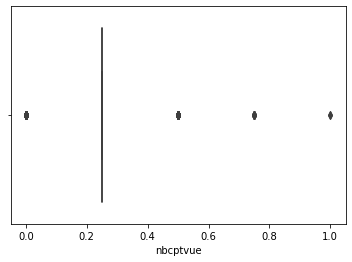

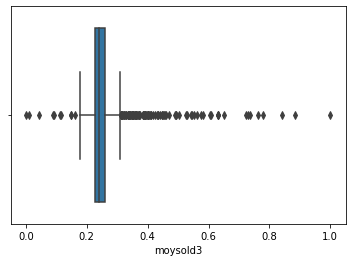

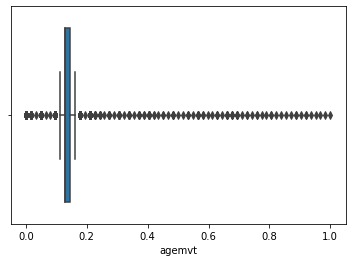

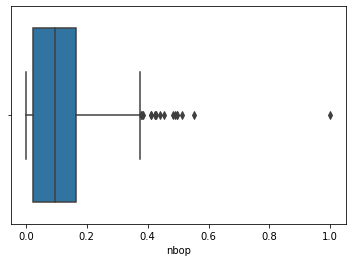

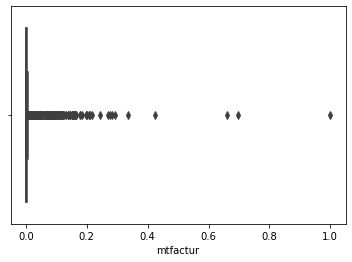

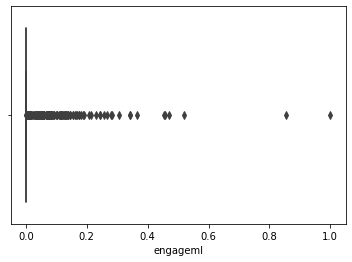

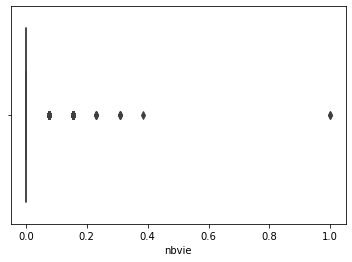

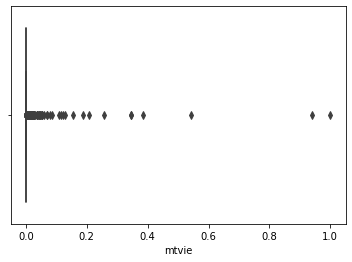

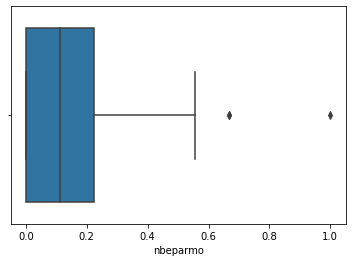

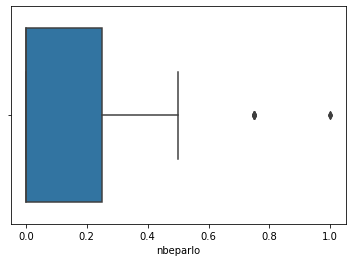

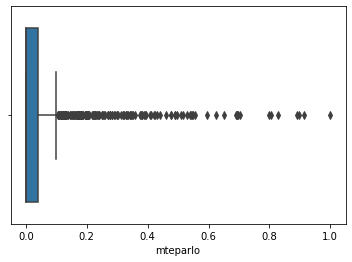

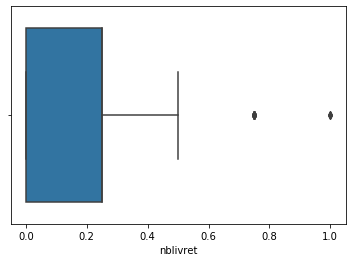

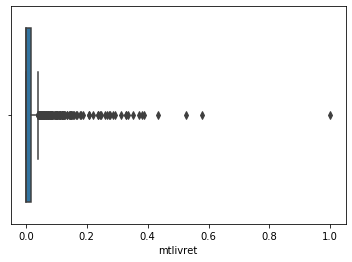

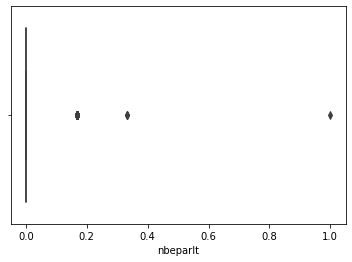

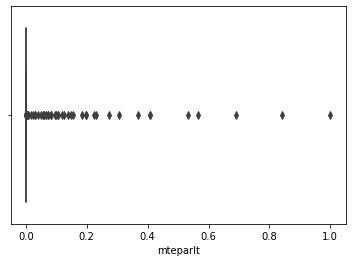

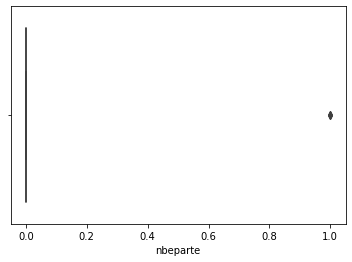

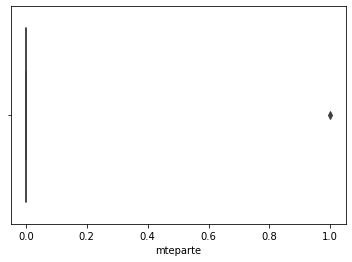

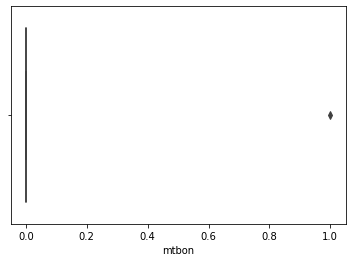

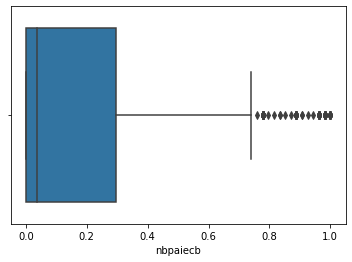

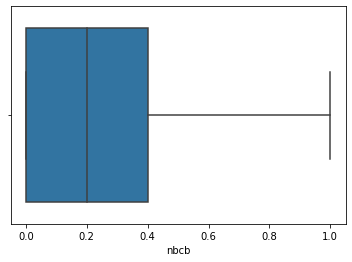

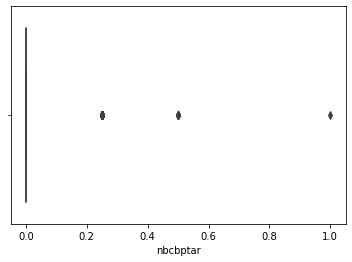

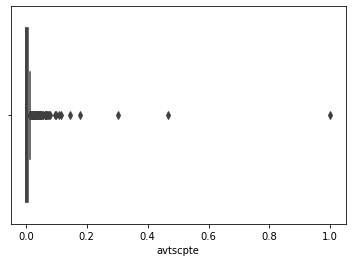

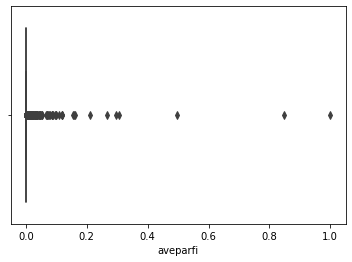

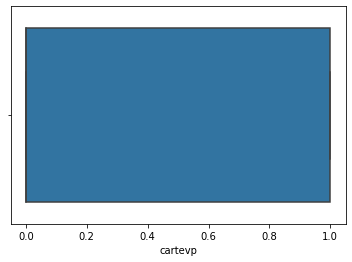

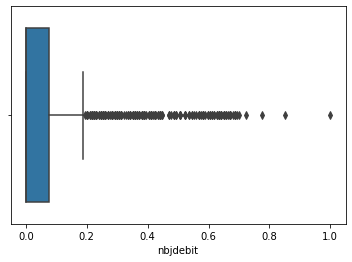

In [29]:
for key in visa_df.keys():
    sns.boxplot(x=visa_df[key])
    plt.show()

Nous utilisons le Z-score, qui est le nombre signé d'écarts-types par lesquels la valeur d'un point d'observation ou de données est supérieure à la valeur moyenne de ce qui est observé ou mesuré. 

In [30]:
from scipy import stats
print(visa_df.shape)
visa_df_z = visa_df[(np.abs(stats.zscore(visa_df)) < 3).all(axis=1)]
print(visa_df_z.shape)
print(sum(visa_df["cartevp"]==1))
print(sum(visa_df_z["cartevp"]==1))

(1073, 42)
(753, 42)
359
195


In [31]:
from scipy import stats
print(visa_df.shape)
visa_df_z = visa_df[(np.abs(stats.zscore(visa_df)) < 6).all(axis=1)]
print(visa_df_z.shape)
print(sum(visa_df["cartevp"]==1))
print(sum(visa_df_z["cartevp"]==1))

(1073, 42)
(1013, 42)
359
313


Cependant, nous remarquons qu'en retirons ces dites valeurs abérantes, nous perdons beaucoup de lignes labellisé en 1. Nous choisisons de continuer notre étude avec le jeu de données complet.

In [32]:
visa_df.shape

(1073, 42)

# Modèle de base (Baseline model)

Nous avons maintenant terminé le nettoyage des données et l'analyse exploratoire. La dernière étape à franchir avant de commencer la modélisation consiste à établir un modèle naïve de base  (Naive Baseline model). Il s'agit essentiellement d'une supposition par rapport à laquelle nous pouvons comparer nos résultats. Si les modèles d'apprentissage automatique ne l'emportent pas sur cette supposition, nous devrons peut-être conclure que l'apprentissage automatique n'est pas acceptable pour la tâche ou nous devrons peut-être essayer une approche différente.

### Répartition en jeu d’apprentissage et jeu de test

Avant de calculer la ligne de base, nous devons diviser nos données en un ensemble d'entrainement et un ensemble de tests

In [0]:
# Diviser en 70% d'entrainement et 30% de test
X = visa_df.loc[:, visa_df.columns != 'cartevp']
y = visa_df["cartevp"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### ZeroR 

ZeroR est la méthode de classification la plus simple qui repose sur la cible et ignore tous les prédicteurs. Le classificateur ZeroR prédit simplement la classe majoritaire. Bien qu'il n'y ait pas de puissance de prévisibilité dans ZeroR, il est utile pour déterminer une performance de référence comme référence pour d'autres méthodes de classification.

In [34]:
# Algorithme de règle zéro pour la classification
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [0]:
baseline_predict = dummy_clf.predict(X_test)

### Métriques de classification

In [0]:
def model_score(model_name, y_true, y_predict, ann=True):
    '''
    Cette fonction calcule les metriques que nous utiliserons pour comparer 
    les algorithmes utilisés en évaluant sur un échantillon test, 
    affiche un dataframe contenant ses metriques, et trace une courbe ROC.
    '''
    
    # Calculer les metriques
    metrics_report = {}
    metrics_report["Accuracy"] = accuracy_score(y_true, y_predict > 0.5)
    metrics_report["AUC"] = roc_auc_score(y_true, y_predict)
    metrics_report["F1 score"] = fbeta_score(y_true, y_predict > 0.5, 1)
    metrics_report["MSE"] = brier_score_loss(y_true, y_predict)

    # Tracer la courbe ROC du modèle de base
    baseline_fpr, baseline_tpr, _ = roc_curve(y_test,  baseline_predict)
    baseline_auc = roc_auc_score(y_test, baseline_predict)
    plt.plot(baseline_fpr,baseline_tpr, linewidth="3")

    # Tracer la courbe ROC du modèle à comparer
    fpr, tpr, thr = roc_curve(y_true, y_predict)
    plt.plot(fpr, tpr, "r", linewidth="3")
    
    # Ajouter les labels, légendes, titre...
    baseline_patch = mpatches.Patch(color='blue', label='baseline')
    model_patch = mpatches.Patch(color='green', label=model_name)
    plt.legend(handles=[baseline_patch, model_patch])
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("Scores du modèle "+ model_name)
    
    # Ajouter les métriques dans le
    plt.annotate("Accuracy: %0.2f" % metrics_report["Accuracy"], (0.65,0.5), size=14)
    plt.annotate("AUC: %0.2f" % metrics_report["AUC"], (0.65,0.4), size=14)
    plt.annotate("F1 score: %0.2f" % metrics_report["F1 score"], (0.65,0.3), size=14)
    plt.annotate("MSE: %0.2f" % metrics_report["MSE"], (0.65,0.2), size=14)
    
    return pd.DataFrame([metrics_report])

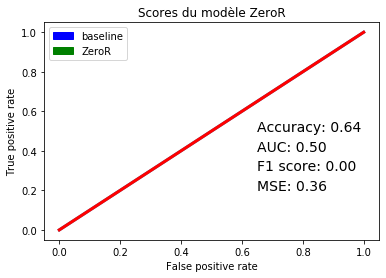

In [37]:
bl_score = model_score("ZeroR", y_test, baseline_predict)

# Algorithmes de classification supervisée

Dans cette partie, nous allons experimenter plusieurs algorithmes de classification supérvisé. Nous allons ensuite stocker les scores issus de chaque modèle afin de comparer et déduire.

In [0]:
# Nous stockons dans ce dictionnaire les différents scores de modèles.
score_dict = {"ZeroR" : bl_score}

### Logistic Regression

In [39]:
# Créer un dictionnaire avec toutes les combinaisons de parametres à tester
param_grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

# Utiliser GridSearch pour tester toutes les valeurs
lr_gscv = GridSearchCV(LogisticRegression(max_iter=1000), param_grid)
lr_gscv.fit(X_train, y_train)
lr_gscv.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_se

{'C': 100.0, 'penalty': 'l2'}

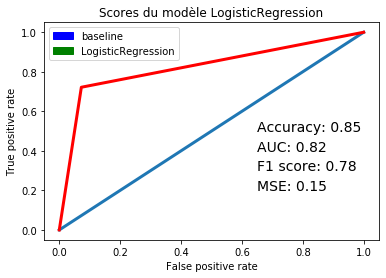

In [40]:
lr = LogisticRegression(C = 100.0, penalty = 'l2', max_iter=1000)
lr_fit = lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
score_dict["LogisticRegression"] = model_score("LogisticRegression", y_test, lr_pred)

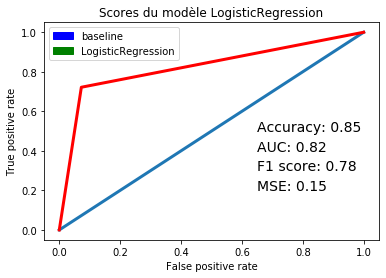

In [41]:
score_dict["LogisticRegression"] = model_score("LogisticRegression", y_test, lr_pred)

In [42]:
lr_pred.shape

(322,)

### Naive Bayes

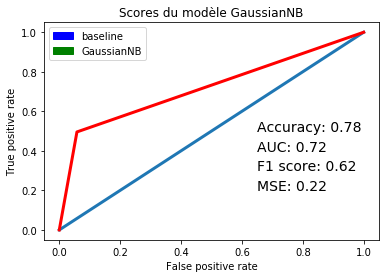

In [43]:
gnb = GaussianNB()
gnb_fit = gnb.fit(X_train, y_train)
gnb_pred = gnb_fit.predict(X_test)
score_dict["GaussianNB"] = model_score("GaussianNB", y_test, gnb_pred)

### Linear SVM

In [44]:
# Créer un dictionnaire avec toutes les combinaisons de parametres à tester
param_grid = {'C':np.arange(0.01,100,10)}

# Utiliser GridSearch pour tester toutes les valeurs
lsvm_gscv = GridSearchCV(LinearSVC(), param_grid, verbose=2)
lsvm_gscv.fit(X_train, y_train)
lsvm_gscv.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=10.01 .........................................................
[CV] .......................................... C=10.01, total=   0.0s
[CV] C=10.01 .........................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packa

[CV] .......................................... C=10.01, total=   0.0s
[CV] C=10.01 .........................................................
[CV] .......................................... C=10.01, total=   0.0s
[CV] C=20.01 .........................................................
[CV] .......................................... C=20.01, total=   0.0s
[CV] C=20.01 .........................................................
[CV] .......................................... C=20.01, total=   0.0s
[CV] C=20.01 .........................................................
[CV] .......................................... C=20.01, total=   0.0s
[CV] C=20.01 .........................................................


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV] .......................................... C=20.01, total=   0.0s
[CV] C=20.01 .........................................................
[CV] .......................................... C=20.01, total=   0.0s
[CV] C=30.01 .........................................................
[CV] .......................................... C=30.01, total=   0.0s
[CV] C=30.01 .........................................................
[CV] .......................................... C=30.01, total=   0.0s
[CV] C=30.01 .........................................................
[CV] .......................................... C=30.01, total=   0.0s
[CV] C=30.01 .........................................................


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV] .......................................... C=30.01, total=   0.0s
[CV] C=30.01 .........................................................
[CV] .......................................... C=30.01, total=   0.0s
[CV] C=40.01 .........................................................
[CV] .......................................... C=40.01, total=   0.0s
[CV] C=40.01 .........................................................
[CV] .......................................... C=40.01, total=   0.0s
[CV] C=40.01 .........................................................
[CV] .......................................... C=40.01, total=   0.0s
[CV] C=40.01 .........................................................


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV] .......................................... C=40.01, total=   0.1s
[CV] C=40.01 .........................................................
[CV] .......................................... C=40.01, total=   0.1s
[CV] C=50.01 .........................................................
[CV] .......................................... C=50.01, total=   0.0s
[CV] C=50.01 .........................................................
[CV] .......................................... C=50.01, total=   0.0s
[CV] C=50.01 .........................................................
[CV] .......................................... C=50.01, total=   0.0s
[CV] C=50.01 .........................................................


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV] .......................................... C=50.01, total=   0.0s
[CV] C=50.01 .........................................................
[CV] .......................................... C=50.01, total=   0.0s
[CV] C=60.01 .........................................................
[CV] .......................................... C=60.01, total=   0.0s
[CV] C=60.01 .........................................................
[CV] .......................................... C=60.01, total=   0.0s
[CV] C=60.01 .........................................................
[CV] .......................................... C=60.01, total=   0.0s
[CV] C=60.01 .........................................................


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV] .......................................... C=60.01, total=   0.0s
[CV] C=60.01 .........................................................
[CV] .......................................... C=60.01, total=   0.0s
[CV] C=70.01 .........................................................
[CV] .......................................... C=70.01, total=   0.0s
[CV] C=70.01 .........................................................
[CV] .......................................... C=70.01, total=   0.0s
[CV] C=70.01 .........................................................
[CV] .......................................... C=70.01, total=   0.0s
[CV] C=70.01 .........................................................


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV] .......................................... C=70.01, total=   0.0s
[CV] C=70.01 .........................................................
[CV] .......................................... C=70.01, total=   0.0s
[CV] C=80.01 .........................................................
[CV] .......................................... C=80.01, total=   0.0s
[CV] C=80.01 .........................................................
[CV] .......................................... C=80.01, total=   0.0s
[CV] C=80.01 .........................................................
[CV] .......................................... C=80.01, total=   0.0s
[CV] C=80.01 .........................................................


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV] .......................................... C=80.01, total=   0.1s
[CV] C=80.01 .........................................................
[CV] .......................................... C=80.01, total=   0.0s
[CV] C=90.01 .........................................................
[CV] .......................................... C=90.01, total=   0.0s
[CV] C=90.01 .........................................................
[CV] .......................................... C=90.01, total=   0.0s
[CV] C=90.01 .........................................................
[CV] .......................................... C=90.01, total=   0.0s
[CV] C=90.01 .........................................................
[CV] .......................................... C=90.01, total=   0.1s
[CV] C=90.01 .........................................................
[CV] .......................................... C=90.01, total=   0.0s


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.1s finished
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


{'C': 30.01}

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


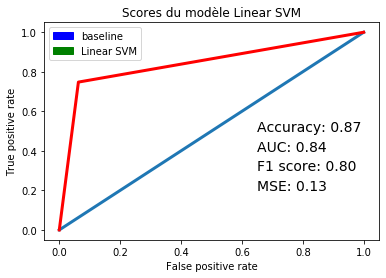

In [45]:
lsvm = LinearSVC(C = 70.01)
lsvm_fit = lsvm.fit(X_train, y_train)
lsvm_pred = lsvm_fit.predict(X_test)
score_dict["Linear SVM"] = model_score("Linear SVM", y_test, lsvm_pred)

### Non-linear SVM

In [46]:
# Créer un dictionnaire avec toutes les combinaisons de parametres à tester
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}

# Utiliser GridSearch pour tester toutes les valeurs
svc_gscv = GridSearchCV(SVC(), param_grid, verbose=2)
svc_gscv.fit(X_train, y_train)
svc_gscv.best_params_

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:   16.1s finished


{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

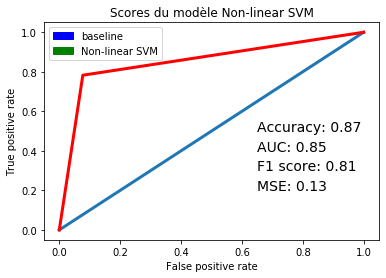

In [47]:
nlsvm = SVC(C=100, gamma=0.1, kernel='rbf')
nlsvm_fit = nlsvm.fit(X_train, y_train)
nlsvm_pred = nlsvm_fit.predict(X_test)
score_dict["Non-linear SVM"] = model_score("Non-linear SVM", y_test, nlsvm_pred)

### KNeighborsClassifier

In [48]:
knn = KNeighborsClassifier()
# Créer un dictionnaire avec toutes les valeurs de voisins à tester
param_grid = {'n_neighbors': np.arange(1, 100)}

# Utiliser GridSearch pour tester toutes les valeurs
knn_gscv = GridSearchCV(knn, param_grid, cv=10)
knn_gscv.fit(X_train, y_train)
knn_gscv.best_params_

{'n_neighbors': 35}

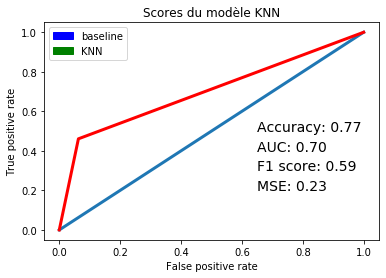

In [49]:
KNN = KNeighborsClassifier(n_neighbors = 35)
KNN_fit = KNN.fit(X_train, y_train)
KNN_pred = KNN_fit.predict(X_test)
score_dict["KNN"] = model_score("KNN", y_test, KNN_pred)

### Decision Tree

In [50]:
# Créer un dictionnaire avec toutes les valeurs à tester
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}

# Utiliser GridSearch pour tester toutes les valeurs
dt_gscv = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10)
dt_gscv.fit(X_train, y_train)
dt_gscv.best_params_

{'criterion': 'entropy', 'max_depth': 4}

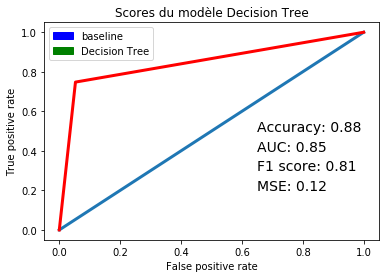

In [51]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=7)
dt_fit = dt.fit(X_train, y_train)
dt_pred = dt_fit.predict(X_test)
score_dict["Decision Tree"] = model_score("Decision Tree", y_test, dt_pred)

### Random Forest

In [52]:
# Créer un dictionnaire avec toutes les valeurs à tester
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]}

# Utiliser GridSearch pour tester toutes les valeurs
rf_gscv = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, verbose=2, n_jobs=-1)
rf_gscv.fit(X_train, y_train)
rf_gscv.best_params_

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  2.3min finished


{'bootstrap': False,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10}

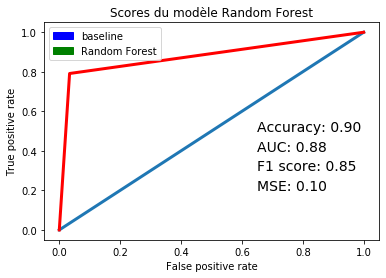

In [53]:
rf = RandomForestClassifier(bootstrap=False, max_depth=40, max_features='sqrt', min_samples_leaf=1, min_samples_split=2)
rf_fit = rf.fit(X_train, y_train)
rf_pred = rf_fit.predict(X_test)
score_dict["Random Forest"] = model_score("Random Forest", y_test, rf_pred)

### AdaBoost

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    4.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    5.1s finished


{'base_estimator': None, 'learning_rate': 1.1, 'n_estimators': 70}


,Accuracy,AUC,F1 score,MSE
0,0.897516,0.870048,0.843602,0.102484


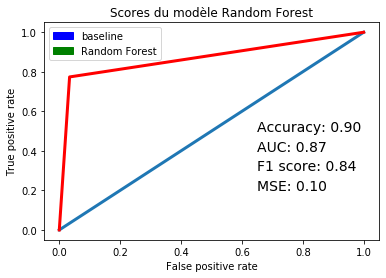

In [54]:
# Créer un dictionnaire avec toutes les valeurs à tester
param_grid = {
    'n_estimators': [50, 60, 70],
    'learning_rate': [0.9, 1, 1.1] ,
    'base_estimator': [None, 
                       #AdaBoostClassifier(), AdaBoostClassifier(n_estimators=50),
                       #RandomForestClassifier(), rf,
                       #DecisionTreeClassifier(), dt,
                       #GradientBoostingClassifier(), gbc,
                       ]
    }

# Utiliser GridSearch pour tester toutes les valeurs
abc_gscv = GridSearchCV(AdaBoostClassifier(), param_grid, cv=5, verbose=2, n_jobs=-1)
abc_gscv.fit(X_train, y_train)
print(abc_gscv.best_params_)
model_score("Random Forest", y_test, abc_gscv.predict(X_test))

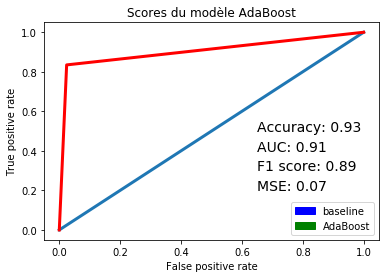

In [55]:
abc = AdaBoostClassifier(n_estimators=50)
abc_fit = abc.fit(X_train, y_train)
abc_pred = abc_fit.predict(X_test)
score_dict["AdaBoost"] = model_score("AdaBoost", y_test, abc_pred)

### GradientBoostingClassifier

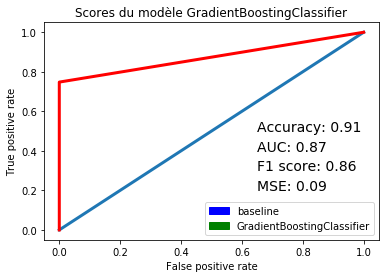

In [56]:
gbc = GradientBoostingClassifier()
gbc_fit = gbc.fit(X_train, y_train)
gbc_pred = gbc_fit.predict(X_test)
score_dict["GradientBoostingClassifier"] = model_score("GradientBoostingClassifier", y_test, gbc_pred)

### XGBoost

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


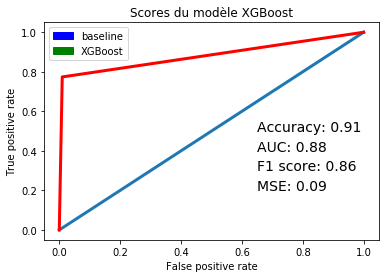

In [57]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

xgb_model = xgb.train(param, D_train, 20)
xgb_preds = xgb_model.predict(D_test)
gbc_pred = np.asarray([np.argmax(line) for line in xgb_preds])

score_dict["XGBoost"] = model_score("XGBoost", y_test, gbc_pred)

### TPOTClassifier

In [58]:
'''
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_Visa_pipeline.py')
'''

"\ntpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)\ntpot.fit(X_train, y_train)\nprint(tpot.score(X_test, y_test))\ntpot.export('tpot_Visa_pipeline.py')\n"

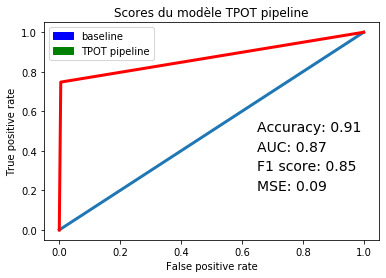

In [59]:
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features=0.9500000000000001, min_samples_leaf=8, min_samples_split=6, n_estimators=100, subsample=0.9500000000000001)),
    RandomForestClassifier(bootstrap=False, criterion="entropy", max_features=0.1, min_samples_leaf=4, min_samples_split=11, n_estimators=100)
)
set_param_recursive(exported_pipeline.steps, 'random_state', 42)
exported_pipeline.fit(X_train, y_train)
tpot_pred = exported_pipeline.predict(X_test)
score_dict["TPOT pipeline"] = model_score("TPOT pipeline", y_test, tpot_pred)

### Misc

In [0]:
#Source: http://www.davidsbatista.net/blog/2018/02/23/model_optimization/
class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=3, n_jobs=3, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [61]:
# Créer un dictionnaire avec toutes les valeurs à tester
models = {
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'SVC': SVC()
}

params = {
    'ExtraTreesClassifier': { 'n_estimators': range(100) },
    'RandomForestClassifier': { 'n_estimators':range(100) },
    'AdaBoostClassifier':  { 'n_estimators': range(100) },
    'GradientBoostingClassifier': { 'n_estimators': range(100), 
                                   'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                     0.5, 0.6, 0.7, 0.8,
                                                     0.9, 1, 1.1, 1.2] },
    'SVC': [
        {'kernel': ['linear'], 'C': range(25)},
        {'kernel': ['rbf'], 'C': range(25), 'gamma': [0.001, 0.0001]},
    ]
}

# Utiliser GridSearch pour tester toutes les valeurs
esh_gscv = EstimatorSelectionHelper(models, params)
esh_gscv.fit(X_train, y_train)

Running GridSearchCV for ExtraTreesClassifier.
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done 146 tasks      | elapsed:    5.5s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:   19.9s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Running GridSearchCV for RandomForestClassifier.
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=3)]: Done 146 tasks      | elapsed:    6.5s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:   24.7s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Running GridSearchCV for AdaBoostClassifier.
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=3)]: Done 136 tasks      | elapsed:    6.9s
[Parallel(n_jobs=3)]: Done 295 out of 300 | elapsed:   28.9s remaining:    0.5s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:   29.7s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Running GridSearchCV for GradientBoostingClassifier.
Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


[Parallel(n_jobs=3)]: Done 146 tasks      | elapsed:    7.2s
[Parallel(n_jobs=3)]: Done 331 tasks      | elapsed:   27.1s
[Parallel(n_jobs=3)]: Done 822 tasks      | elapsed:  1.1min
[Parallel(n_jobs=3)]: Done 1436 tasks      | elapsed:  2.0min
[Parallel(n_jobs=3)]: Done 2234 tasks      | elapsed:  3.2min
[Parallel(n_jobs=3)]: Done 3210 tasks      | elapsed:  4.5min
[Parallel(n_jobs=3)]: Done 3600 out of 3600 | elapsed:  5.0min finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Running GridSearchCV for SVC.
Fitting 3 folds for each of 75 candidates, totalling 225 fits


[Parallel(n_jobs=3)]: Done 208 tasks      | elapsed:    4.5s
[Parallel(n_jobs=3)]: Done 225 out of 225 | elapsed:    4.8s finished


In [62]:
esh_gscv.score_summary(sort_by='max_score')

ExtraTreesClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
SVC


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,estimator,min_score,mean_score,max_score,std_score,C,gamma,kernel,learning_rate,n_estimators
669,GradientBoostingClassifier,0.908367,0.930789,0.964,0.0239593,NaN,NaN,NaN,0.4,69
671,GradientBoostingClassifier,0.920319,0.936106,0.964,0.019781,NaN,NaN,NaN,0.4,71
673,GradientBoostingClassifier,0.916335,0.934778,0.964,0.0208985,NaN,NaN,NaN,0.4,73
674,GradientBoostingClassifier,0.912351,0.93345,0.964,0.0221193,NaN,NaN,NaN,0.4,74
676,GradientBoostingClassifier,0.908367,0.930789,0.964,0.0239593,NaN,NaN,NaN,0.4,76
...,...,...,...,...,...,...,...,...,...,...
1300,GradientBoostingClassifier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.1,0
1400,GradientBoostingClassifier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.2,0
1500,SVC,NaN,NaN,NaN,NaN,0,NaN,linear,NaN,NaN
1525,SVC,NaN,NaN,NaN,NaN,0,0.001,rbf,NaN,NaN


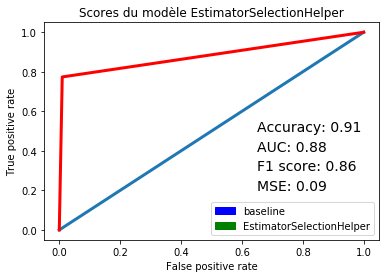

In [63]:
misc = GradientBoostingClassifier(learning_rate=0.9, n_estimators=69)
misc_fit = misc.fit(X_train, y_train)
misc_pred = misc_fit.predict(X_test)
score_dict["EstimatorSelectionHelper"] = model_score("EstimatorSelectionHelper", y_test, gbc_pred)

# Comparaison des modèles

In [64]:
accuracy_list = [float(score["Accuracy"]) for score in score_dict.values()]
mse_list = [float(score["MSE"]) for score in score_dict.values()]
auc_list = [float(score["AUC"]) for score in score_dict.values()]
fscore_list = [float(score["F1 score"]) for score in score_dict.values()]
model_comparison = pd.DataFrame({'model': list(score_dict.keys()),
                                 'Accuracy': accuracy_list,
                                 'MSE': mse_list,
                                 'AUC': auc_list,
                                 'F1 score': fscore_list})

model_comparison.sort_values('Accuracy', ascending=False)

,model,Accuracy,MSE,AUC,F1 score
8,AdaBoost,0.925466,0.074534,0.905314,0.888889
10,XGBoost,0.913043,0.086957,0.882126,0.864078
12,EstimatorSelectionHelper,0.913043,0.086957,0.882126,0.864078
9,GradientBoostingClassifier,0.909938,0.090062,0.873913,0.855721
11,TPOT pipeline,0.906832,0.093168,0.871498,0.851485
7,Random Forest,0.903727,0.096273,0.878744,0.854460
6,Decision Tree,0.875776,0.124224,0.847343,0.811321
4,Non-linear SVM,0.872671,0.127329,0.852657,0.814480
3,Linear SVM,0.869565,0.130435,0.842512,0.803738
1,LogisticRegression,0.854037,0.145963,0.824638,0.779343


In [0]:
def plot_models_comparison(metric, color, asc=True):
    '''
    Tracer un bar plot horizontal
    '''
    model_comparison.sort_values(metric, ascending=asc).plot(
    x = 'model', y = metric, kind = 'barh',color = color, edgecolor = 'black')
    plt.ylabel('')
    plt.yticks(size = 14) 
    plt.xlabel(metric) 
    plt.xticks(size = 14)
    plt.title('Model Comparison on Test '+metric, size = 15)

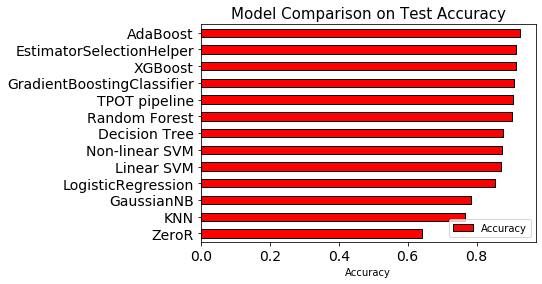

In [66]:
plot_models_comparison('Accuracy', 'red')

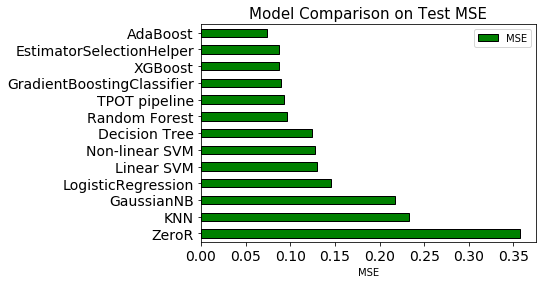

In [67]:
plot_models_comparison('MSE', 'green', False)

# Conclusions 

Pour cette partie, nous nous contentons à raisonner sur le modèle qui a donnée les meilleurs résultats.
Les modèles qui utilisent les méthodes d’ensembles ou de boosting comme AdaBoost peuvent également calculer l'importance relative de chaque variable. Ces valeurs d'importance peuvent être utilisées pour informer un processus de sélection.


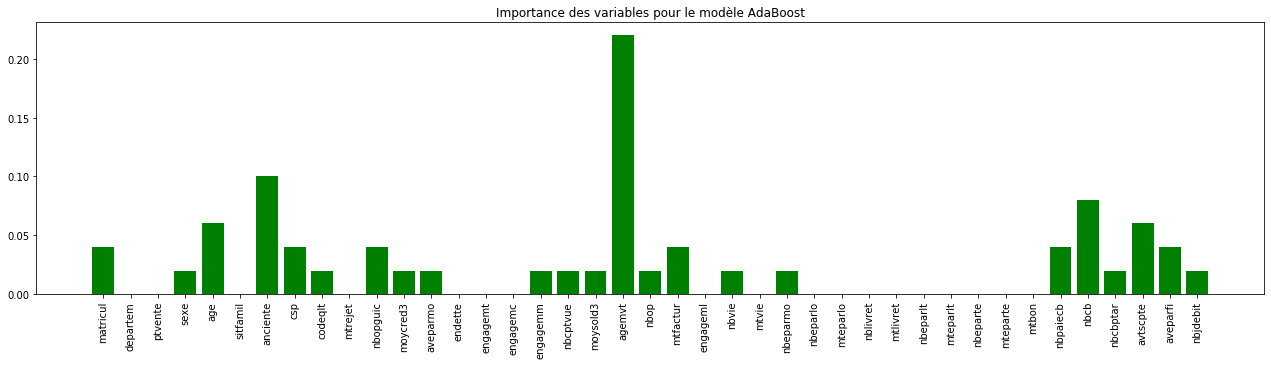

In [68]:
plt.subplots(figsize=(22,5))
plt.xticks(rotation=90)
plt.bar(X_train.keys(), abc_fit.feature_importances_, color='g')
plt.title("Importance des variables pour le modèle AdaBoost")
plt.show()

In [0]:
importante_variables = pd.DataFrame(columns=['Variable', 'valeur d\'importance'])
non_importance_variables = []
for i in range(len(X_train.keys())):
    if abc_fit.feature_importances_[i] != 0:
        importante_variables.loc[i] = [X_train.keys()[i], abc_fit.feature_importances_[i]]
    else:
        non_importance_variables.append(X_train.keys()[i])

In [70]:
importante_variables.sort_values("valeur d\'importance", ascending=0)

,Variable,valeur d'importance
19,agemvt,0.22
6,anciente,0.10
36,nbcb,0.08
4,age,0.06
38,avtscpte,0.06
0,matricul,0.04
21,mtfactur,0.04
7,csp,0.04
39,aveparfi,0.04
10,nbopguic,0.04


In [71]:
non_importance_variables

['departem',
 'ptvente',
 'sitfamil',
 'mtrejet',
 'endette',
 'engagemt',
 'engagemc',
 'engageml',
 'mtvie',
 'nbeparlo',
 'mteparlo',
 'nblivret',
 'mtlivret',
 'nbeparlt',
 'mteparlt',
 'nbeparte',
 'mteparte',
 'mtbon']

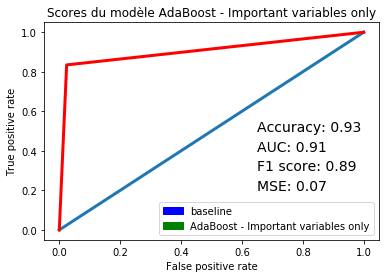

In [72]:
# Re-entrainer AdaBoost uniquement avec les variables qui ont une importance non-nulle

X_imp = X.drop(list(non_importance_variables),axis=1)
y_imp = y

X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_imp, y_imp, test_size = 0.3, random_state = 42)

abc_imp = AdaBoostClassifier(n_estimators=50)
abc_imp_fit = abc_imp.fit(X_train_imp, y_train_imp)
abc_imp_pred = abc_imp_fit.predict(X_test_imp)
score_dict["AdaBoost - Important variables only"] = model_score("AdaBoost - Important variables only", y_test_imp, abc_imp_pred)